In [2]:
import tensorflow as tf
import os
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.callbacks import Callback, EarlyStopping
from keras import regularizers
from keras.optimizers import Adam
import keras_tuner as kt
from keras.utils import plot_model
from keras.losses import categorical_crossentropy, binary_crossentropy


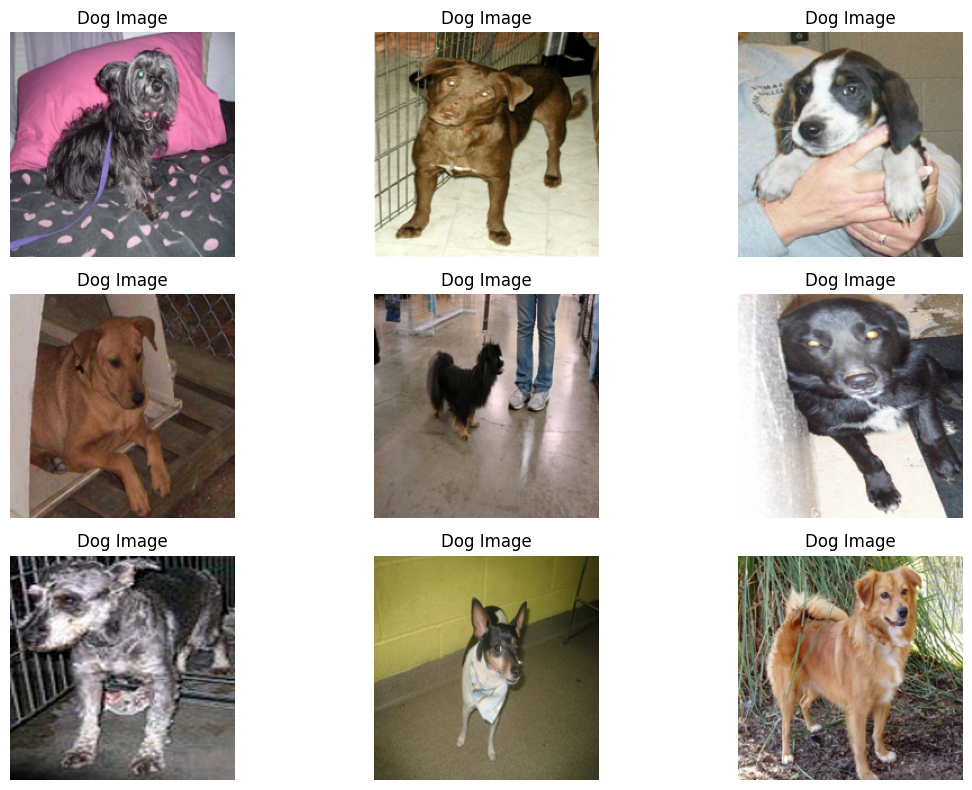

In [3]:
#Rutas a los Directorios de entrenamiento y validación
train_dir = r"C:\Users\User\OneDrive\Escritorio\Img\train"
validation_dir = r"C:\Users\User\OneDrive\Escritorio\Img\test1"



#Utilzamos Path.Join para unir los != componentes de la ruta
dog_subfolder = os.path.join(train_dir, "Dog")

# Obtener una lista con las imágenes de lo gatos:
dog_image_files = os.listdir(dog_subfolder)

dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    #Utilizamos la Librería PIL (pillow) para abrir y reajstar las imágenes
    img = Image.open(img_path)  
    img = img.resize((200, 200))
    #Normalización de las imágenes [0-1]
    img_array = np.array(img) / 255.0
    dog_images.append(img_array)


# Create a single figure to display all nine images
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

plt.tight_layout()
plt.show()


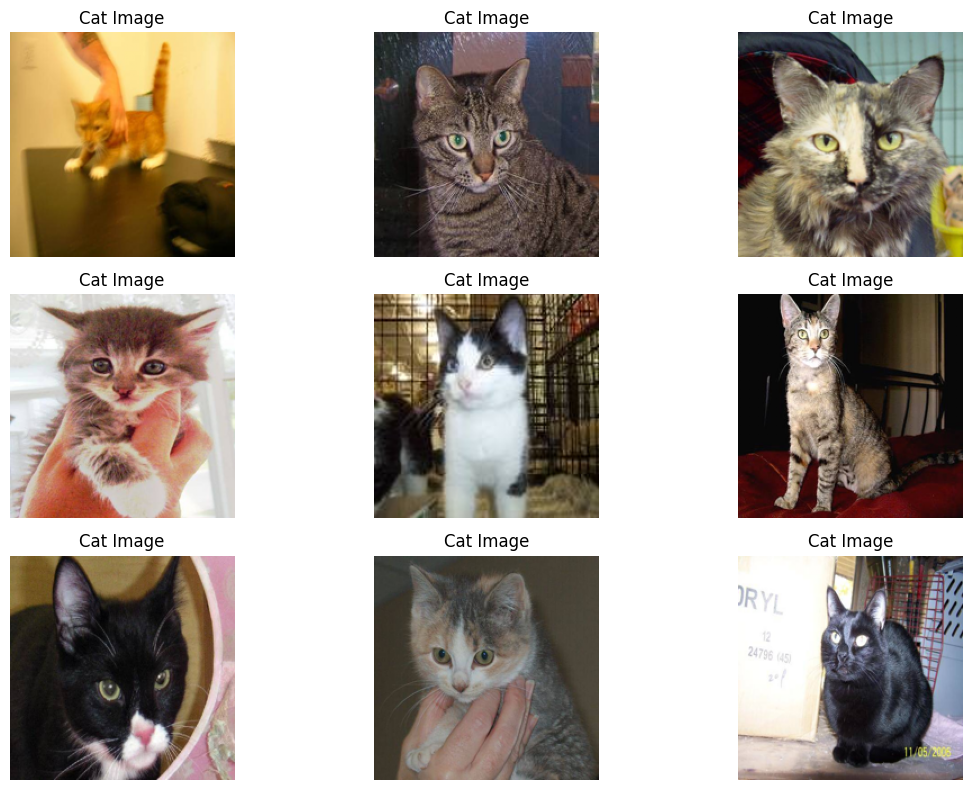

In [4]:
#Mismo proceso para las imágenes de gatos: 


cat_subfolder = os.path.join(train_dir, "Cat")
cat_image_files = os.listdir(cat_subfolder)

cat_images = []
for i in range(9):
    img_path = os.path.join(cat_subfolder, cat_image_files[i])
    img = Image.open(img_path)  # Adjust target_size as needed
    img = img.resize((200, 200))
    img_array = np.array(img) / 255.0
    cat_images.append(img_array)


# Create a single figure to display all nine images
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cat_images[i])
    plt.title('Cat Image')
    plt.axis('off')

plt.tight_layout()
plt.show()


A continuación creamos el generador de imágenes con ImageDataGenerator (Keras) y realizamos el aumento de datos en el conjunto de entrenamiento.

El aumento de datos es una técnica útil para aumentar la diversidad de los datos de entrenamiento y ayudar a prevenir el sbreajuste en los modelos de aprendizaje profundo. 
Al introducir pequeñas variaciones en las imágenes durante el entranamiento, el modelo se vuelve más robusto y generaliza mejor a datos nuevos. 

In [5]:
# Instanciar el generador de imágenes para el conjunto de entrenamiento:

rango_rotacion = 30
mov_ancho = 0.25
mov_alto = 0.25
rango_acercamiento=[0.5,1.5]


train_datagen = ImageDataGenerator(
    rotation_range = rango_rotacion,
    width_shift_range = mov_ancho,
    height_shift_range = mov_alto,
    zoom_range=rango_acercamiento,
)


#Definir el Generador de Imágenes para el conjunto de Validación
validation_datagen = ImageDataGenerator(rescale=1./255)

#Crear generadores de imágenes para entrenamiento:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),  # Reescalar imágenes a 200x200 píxeles
    batch_size=32,
    classes= ["Dog", "Cat"]  # Si tienes más de dos clases, usa 'categorical'
)


#Crear generadores de imágenes para test:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(200, 200),
    batch_size=32,
    classes = ["test"]
)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [6]:
#Montaje y Entrenamiento del Modelo:

model = Sequential()
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Move the Data through the Dense Layers
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#Model Compile

model.compile(loss = 'categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics = ["accuracy"])

In [8]:
#Entrenamiento del Modelo: 

print("Entrenando al Modelo...")

model.fit(train_generator, epochs=2, batch_size=32, verbose=1)

print("MODELO ENTRENADO")


Entrenando al Modelo...


Epoch 1/2


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 28/782 ━━━━━━━━━━━━━━━━━━━━ 40:30:42 193s/step - accuracy: 0.5022 - loss: 1332.0166